Text(0.5, 1.0, 'original data')

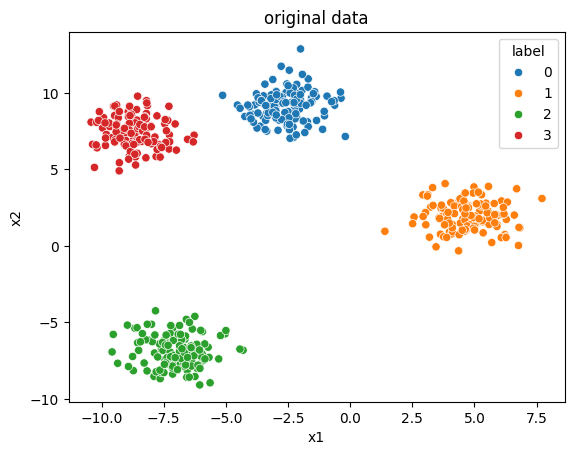

In [94]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X, y = make_blobs(500,centers=4,cluster_std=1, random_state=42)

df = pd.DataFrame([X[:, 0],X[:, 1], y]).T
df.columns = ["x1","x2","label"]
df["label"] = df.label.astype(int)

sns.scatterplot(data=df, x="x1",y="x2", hue="label",palette="tab10")
plt.title("original data")

In [95]:
X = df.drop("label", axis=1)



In [96]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

scaled_X = scaler.fit_transform(X)

scaled_X

array([[-8.15393328e-01,  5.89389514e-01],
       [-1.17344434e+00, -1.55328827e+00],
       [ 1.93881064e+00, -2.72988947e-01],
       [ 9.28424972e-02,  7.36467119e-01],
       [-4.33974739e-01, -1.60921239e+00],
       [-5.04330308e-01, -1.68003168e+00],
       [-5.47762469e-01,  6.85359930e-01],
       [-6.10539342e-01, -1.55264699e+00],
       [ 1.32087749e+00, -1.67723315e-01],
       [-7.80373068e-01, -1.54058120e+00],
       [ 1.40075021e+00, -3.16183108e-01],
       [ 3.87010964e-01,  8.38083386e-01],
       [ 1.92804146e+00, -4.53794362e-01],
       [ 2.75523325e-01,  1.14731880e+00],
       [-6.06874712e-01, -1.21663497e+00],
       [ 1.72418817e+00, -4.23230678e-01],
       [ 1.53565087e-01,  1.12644762e+00],
       [-1.24639080e+00,  7.60994391e-01],
       [-1.01780118e+00,  8.68971311e-01],
       [-4.26463166e-02,  7.78722090e-01],
       [ 1.25809683e+00, -5.62247686e-02],
       [ 2.06846826e-01,  6.58037005e-01],
       [ 1.63277791e+00, -9.60154580e-02],
       [-7.

Text(0.5, 1.0, 'Scaled X')

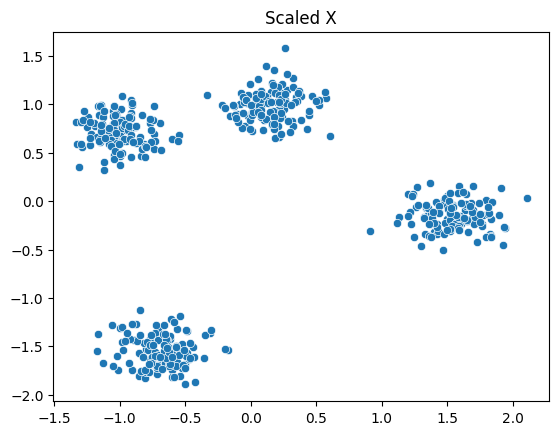

In [97]:
sns.scatterplot(x=scaled_X[:,0], y=scaled_X[:,1])
plt.title("Scaled X")

kmeans clustering is an unsupervised learning algo, which means that there are no labels

1.knumber of clusters are chosen
kpoints are randomly seleceted as cluster centers
the nearest point to each cluster center are classified as that cluster
the center of the cluster is ercalculated
repeat 3 and 4 until convergence
note that nearest points are defined b some distance metric

### choose K

plot an elbow plot of usm of squared distances, inertia in sklearn, and find an inflexion point to hoose k, i.e  the point with significant lower rate of change
 than before

 domain skills its importand to understand your dataset to find an adequate k and also eqqually important to be able to know what the clusters represent

 note that i is hard to find correct number of clusters, and it is here the art anddomain skills become more important


[Text(0.5, 1.0, 'Elbow plot for k'),
 Text(0.5, 0, 'number of clusters k'),
 Text(0, 0.5, 'sum of squared distances to cluster centers')]

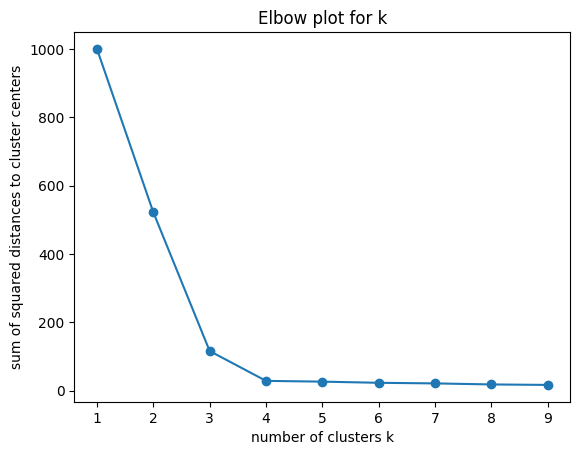

In [98]:
from sklearn.cluster import KMeans

clusters = range(1,10)

sum_squared_distances = [KMeans(k).fit(scaled_X).inertia_ for k in clusters]

fig, ax = plt.figure(), plt.axes()
ax.plot(clusters, sum_squared_distances, "-o")
ax.set(title="Elbow plot for k", xlabel= "number of clusters k", ylabel="sum of squared distances to cluster centers")

In [99]:
SSD_differences = pd.Series(sum_squared_distances).diff()[1:]
SSD_differences.index = clusters[:-1]
SSD_differences

1   -477.842946
2   -406.061375
3    -87.308740
4     -2.219029
5     -3.404405
6     -1.752544
7     -3.053563
8     -1.402151
dtype: float64

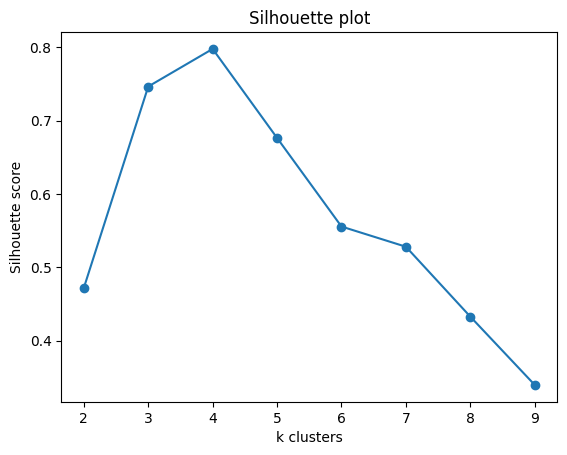

In [100]:
# silhouette
from sklearn.metrics import silhouette_score
kmeans = [KMeans(n_clusters=k).fit(scaled_X) for k in clusters]
fig, ax = plt.figure(), plt.axes()


silhouette_list = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
ax.plot(clusters[1:], silhouette_list, "o-")
ax.set(title = "Silhouette plot", xlabel = "k clusters", ylabel = "Silhouette score");

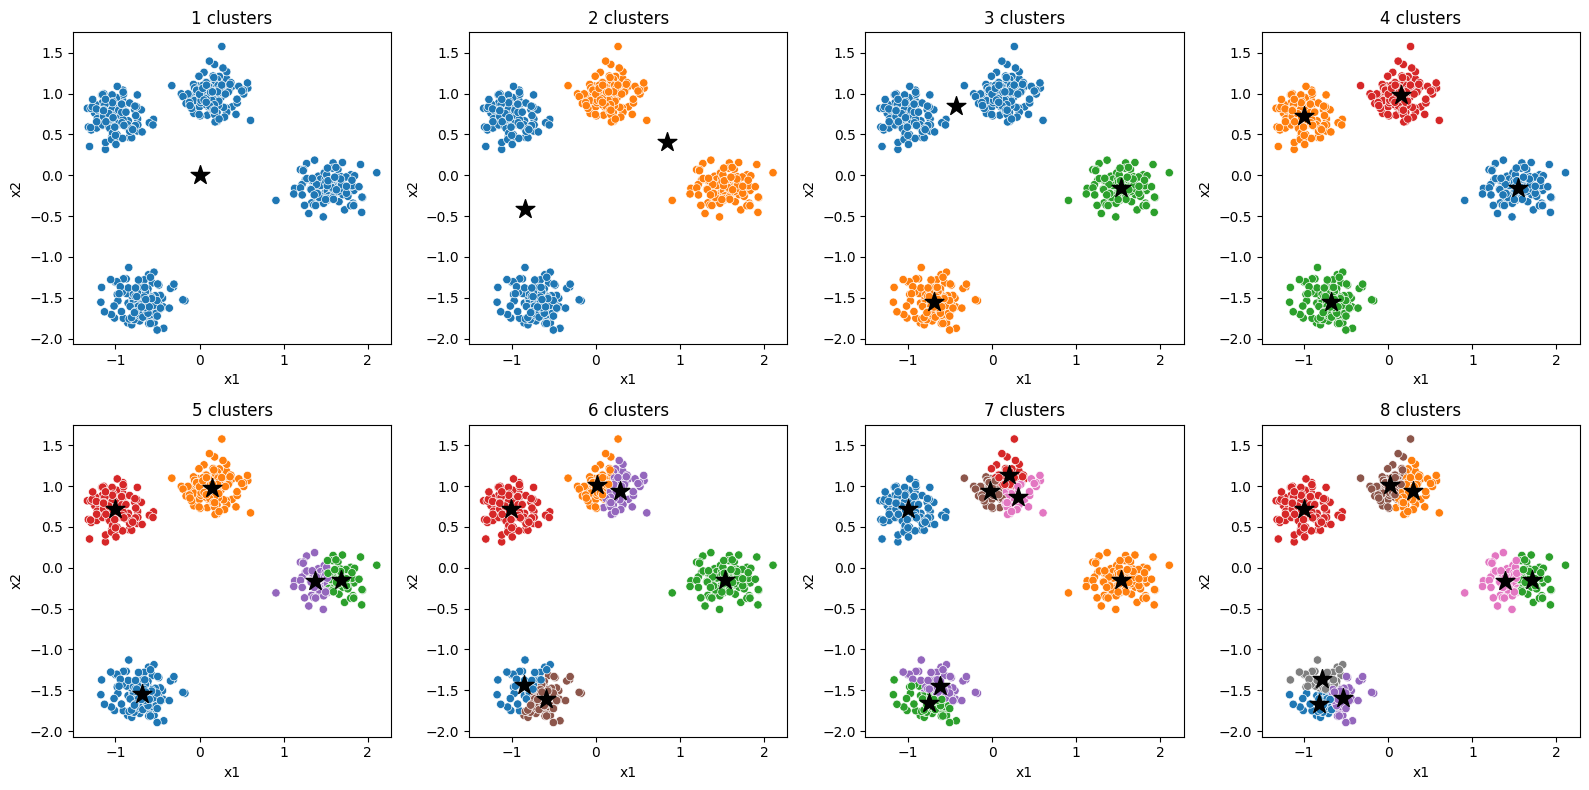

In [102]:
df_plot = pd.DataFrame(scaled_X, columns=["x1","x2"])

number_plots = round(len(clusters)/2)

fig, axes = plt.subplots(2,number_plots,figsize=(16,8))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_
    sns.scatterplot(data=df_plot, x="x1", y="x2", hue="label", ax=ax, palette="tab10")

    ax.scatter(cluster_centers[:,0],cluster_centers[:,1], s=200,marker="*",color="black", label="centroid")
    ax.legend([],[], frameon=False)
    ax.set(title = f"{i+1} clusters")
    plt.tight_layout()